# **MNIST Classifier**
In this notebook we will create a classifier which can classify handwritten digits. 

In [86]:
%tensorflow_version 2.x

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from tensorflow.keras import datasets, layers

Load MNIST Dataset

In [87]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [88]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


Our images are 28x28 pixels, and the split is 60000 training samples, 10000 test samples

Let's take a look at a few samples

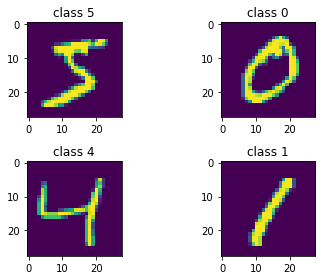

In [89]:
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title('class {}'.format(y_train[i]))
  plt.imshow(x_train[i])
plt.tight_layout()

## Normalization
Typically, with neural networks we like to normalize the data. This is because having data which is not normalized means that higher values can have a disproportionate affect on the neural network. For example, if we have a neural network being used to guess house prices, the neural network will be more biased to high-priced houses because they have affect the weights on a larger scale during the training process. To combat we use a process called normalization.

In [90]:
print(x_train.dtype)
print(np.max(x_train[0]))
print(np.max(y_train))

uint8
255
9


The data type is unsigned integer 8. We need to normalize each piece of data by the maximum value.

Since there are 8 bits, the max value is 2^8 - 1 (i.e. 255). We can simply normalize by dividing by this value, or we can use the handly normalize function provided by keras.

In [91]:
x_train = x_train / 255.
x_test = x_test / 255.
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

print(np.max(x_train[0]))
print(np.min(x_train[0]))

1.0
0.0


In [92]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [93]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9919
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0204 - accuracy: 0.9935


In [115]:
model.summary()
model.save('num_classifier.model')
print('model saved')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: num_classifier.model/assets
model saved


In [114]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0919 - accuracy: 0.9781
